### Create and save a basic linear regression

Create alinear regressor and save as pickled object. Attempt to parse to PMML

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression, Lasso, Ridge
import pickle

In [2]:
%matplotlib inline

In [3]:
def regress_params(clf):
    """Get the parameters of an sklearn logistic classifier. 
    Internally uses pickle to serialize the classifier object.
    
    ::params clf: a logistic regression classifier 
    
    ::returns m: tuple of type, type. The classifier type, and __builtin__ type
    ::returns d: dict. Dictionary of the trained model parameters. 
    """
    s = pickle.dumps(clf)
    l = s.split("\n(dp")
    try:
        m = pickle.loads("(csklearn." + (l[0].rsplit("\n",1)[0] + "\n.").split("sklearn.")[1])
    except "EOFError":
        m = None
        print("Unexpected sklearn classifier format.")
    if len(l) == 2:
        # the pickled representation ends in "b." which needs to be replaced by "."
        d = pickle.loads("(dp" + l[1].rstrip("b.") + ".")
    else:
        print("Encountered unexpected pickle format containing %d dicts." %(len(l) - 1))
        d = None
    
    return m, d

### Single intput, single output

In [35]:
x = np.linspace(0., 1., 101)
y = 0.2 + 0.6 * x + 0.05 * np.random.randn(101)
x = x.reshape((x.shape[0],1))

In [36]:
clf = LinearRegression()
clf.fit(x, y)
mo, do = regress_params(clf)
print do
print mo

{'normalize': False, 'n_jobs': 1, 'residues_': 0.31782157278394396, 'fit_intercept': True, 'singular_': array([ 2.93001706]), 'coef_': array([ 0.61009408]), 'copy_X': True, 'rank_': 1, 'intercept_': 0.19468273352536469}
(<class 'sklearn.linear_model.base.LinearRegression'>, <type 'object'>, None)


In [39]:
clf = Lasso()
clf.fit(x, y)
mo, do = regress_params(clf)
print do
print mo

{'normalize': False, 'warm_start': False, 'selection': 'cyclic', 'fit_intercept': True, 'l1_ratio': 1.0, 'max_iter': 1000, 'n_iter_': 1, 'intercept_': 0.49972977384938788, 'precompute': False, 'random_state': None, 'tol': 0.0001, 'positive': False, 'copy_X': True, 'alpha': 1.0, 'coef_': array([ 0.]), 'dual_gap_': array(0.0)}
(<class 'sklearn.linear_model.coordinate_descent.Lasso'>, <type 'object'>, None)


In [42]:
clf = Ridge()
clf.fit(x, y)
mo, do = regress_params(clf)
print do
print mo

{'normalize': False, 'fit_intercept': True, 'solver': 'auto', 'max_iter': None, 'coef_': array([ 0.54644316]), 'tol': 0.001, 'copy_X': True, 'alpha': 1.0, 'intercept_': 0.22650819417471485}
(<class 'sklearn.linear_model.ridge.Ridge'>, <type 'object'>, None)


In [43]:
y_pred = clf.predict(x)
y_ref = 0.2 + 0.6 * x

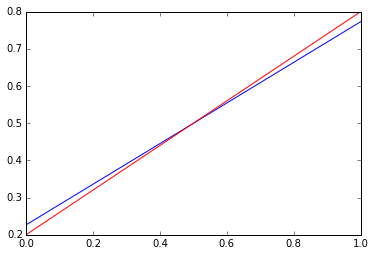

In [44]:
plt.plot(x, y_pred)
plt.plot(x,y_ref,c='red')
plt.show()

### Multiple input

In [46]:
def create_grid(x1_min, x1_max, x2_min, x2_max, num_points=101):
    """
    Create a grid with num_points points in each dimension. 
    
    x1_min, x1_max, x2_min, x2_max: float, the grid limits
    num_points: int
    """
    dx1 = (x1_max - x1_min) / (num_points - 1)
    dx2 = (x2_max - x2_min) / (num_points - 1)
    xx, yy = np.meshgrid(np.arange(x1_min, x1_max, dx1),
                         np.arange(x2_min, x2_max, dx2))
    return xx, yy

In [49]:
X1, X2 = create_grid(0., 1., 0., 1.)
Y = 0.2 + 0.4 * X1 + 0.6 * X2 + 0.05 * np.random.randn(100,100)

In [50]:
x1 = X1.reshape(X1.shape[0]*X1.shape[1])
x2 = X2.reshape(X2.shape[0]*X2.shape[1])
y= Y.reshape(Y.shape[0]*Y.shape[1])
X = np.vstack((x1, x2)).T
y.shape

(10000,)

In [52]:
clf = LinearRegression()
clf.fit(X,y)
mo, do = regress_params(clf)
print do
print mo

{'normalize': False, 'n_jobs': 1, 'residues_': 25.705971684200918, 'fit_intercept': True, 'singular_': array([ 28.86607005,  28.86607005]), 'coef_': array([ 0.4005646,  0.6006029]), 'copy_X': True, 'rank_': 2, 'intercept_': 0.19941363468542705}
(<class 'sklearn.linear_model.base.LinearRegression'>, <type 'object'>, None)


In [53]:
clf = Lasso()
clf.fit(X,y)
mo, do = regress_params(clf)
print do
print mo

{'normalize': False, 'warm_start': False, 'selection': 'cyclic', 'fit_intercept': True, 'l1_ratio': 1.0, 'max_iter': 1000, 'n_iter_': 1, 'intercept_': 0.6949915465449894, 'precompute': False, 'random_state': None, 'tol': 0.0001, 'positive': False, 'copy_X': True, 'alpha': 1.0, 'coef_': array([ 0.,  0.]), 'dual_gap_': array(0.0)}
(<class 'sklearn.linear_model.coordinate_descent.Lasso'>, <type 'object'>, None)


In [54]:
clf = Ridge()
clf.fit(X,y)
mo, do = regress_params(clf)
print do
print mo

{'normalize': False, 'fit_intercept': True, 'solver': 'auto', 'max_iter': None, 'coef_': array([ 0.40008445,  0.59988297]), 'tol': 0.001, 'copy_X': True, 'alpha': 1.0, 'intercept_': 0.20000767473562209}
(<class 'sklearn.linear_model.ridge.Ridge'>, <type 'object'>, None)
